In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [145]:
df = pd.read_csv('business_data.csv')

In [155]:
df['Date'] = pd.to_datetime(df['Date'])

In [159]:
df = df.dropna() 

In [161]:
df.head()

,Date,Region,Brand,Product,Product Type,Sales,Profit,Units Sold,Discount (%),Customer Rating
0,2023-10-08,South,Brand D,Product 4,Home Appliances,5167.57,1068.98,169,9.42,3.5
1,2023-02-19,South,Brand A,Product 2,Home Appliances,7116.00,3265.34,76,22.10,3.7
2,2023-01-08,South,Brand C,Product 2,Electronics,7213.94,4065.56,62,16.61,2.4
3,2023-11-26,South,Brand D,Product 2,Apparel,2356.70,550.70,206,6.52,3.6
4,2023-04-30,West,Brand D,Product 2,Consumer Goods,9979.32,4251.65,267,6.29,4.9


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             500 non-null    datetime64[ns]
 1   Region           500 non-null    object        
 2   Brand            500 non-null    object        
 3   Product          500 non-null    object        
 4   Product Type     500 non-null    object        
 5   Sales            500 non-null    float64       
 6   Profit           500 non-null    float64       
 7   Units Sold       500 non-null    int64         
 8   Discount (%)     500 non-null    float64       
 9   Customer Rating  500 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 39.2+ KB


In [165]:
df.describe()

,Date,Sales,Profit,Units Sold,Discount (%),Customer Rating
count,500,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2023-06-16 23:48:28.800000,5502.152860,2553.649840,259.430000,15.297840,2.973200
min,2023-01-01 00:00:00,1023.120000,108.810000,10.000000,0.040000,1.000000
25%,2023-03-17 06:00:00,3179.880000,1397.457500,137.000000,7.542500,2.000000
50%,2023-06-11 00:00:00,5461.575000,2518.335000,265.000000,16.280000,3.000000
75%,2023-09-17 00:00:00,7845.102500,3710.390000,377.250000,22.385000,3.900000
max,2023-12-10 00:00:00,9980.080000,4997.200000,499.000000,29.750000,5.000000
std,NaN,2607.467025,1395.360715,141.235222,8.577269,1.107852


In [171]:
#Removing of outliersd
z_scores = np.abs(stats.zscore(df[['Sales', 'Profit', 'Units Sold', 'Discount (%)', 'Customer Rating']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)] 


In [173]:
scaler = StandardScaler()
df_no_outliers[['Sales', 'Profit', 'Units Sold', 'Discount (%)', 'Customer Rating']] = scaler.fit_transform(
    df_no_outliers[['Sales', 'Profit', 'Units Sold', 'Discount (%)', 'Customer Rating']])

In [177]:
correlation_matrix = df_no_outliers[['Sales', 'Profit', 'Units Sold', 'Discount (%)', 'Customer Rating']].corr()
correlation_matrix

,Sales,Profit,Units Sold,Discount (%),Customer Rating
Sales,1.000000,0.052302,0.011472,0.003470,-0.001818
Profit,0.052302,1.000000,0.012917,-0.030559,-0.117482
Units Sold,0.011472,0.012917,1.000000,-0.022831,-0.064682
Discount (%),0.003470,-0.030559,-0.022831,1.000000,0.021932
Customer Rating,-0.001818,-0.117482,-0.064682,0.021932,1.000000


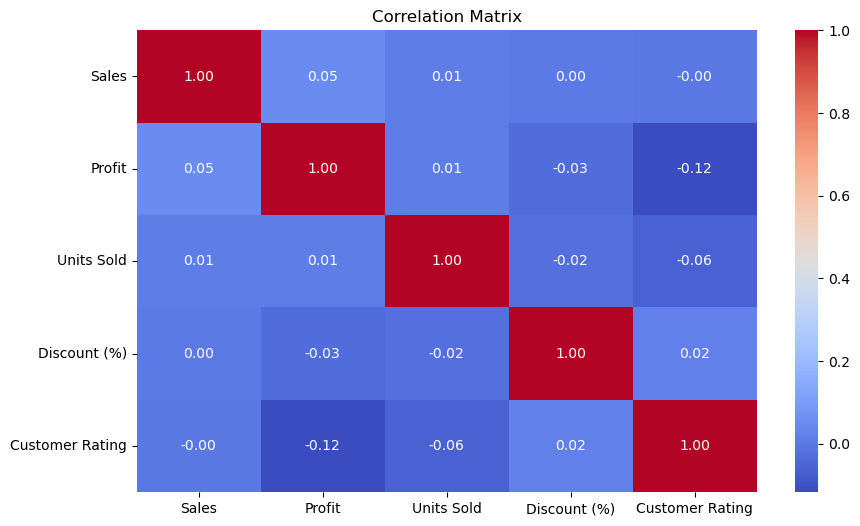

In [179]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Positive Correlations:
#1.Danceability and valence are moderately positively correlated.
#2.loudness has a positive correlation with energy.

#Negative Correlations:
#1.Acousticness is negatively correlated with energy and loudness.
#2.Popularity has weak correlations with other features, suggesting limited linear relationships.

Shapiro-Wilk Test for Sales: Test Statistic = 0.9503, p-value = 0.0000
The data for Sales is not normally distributed.



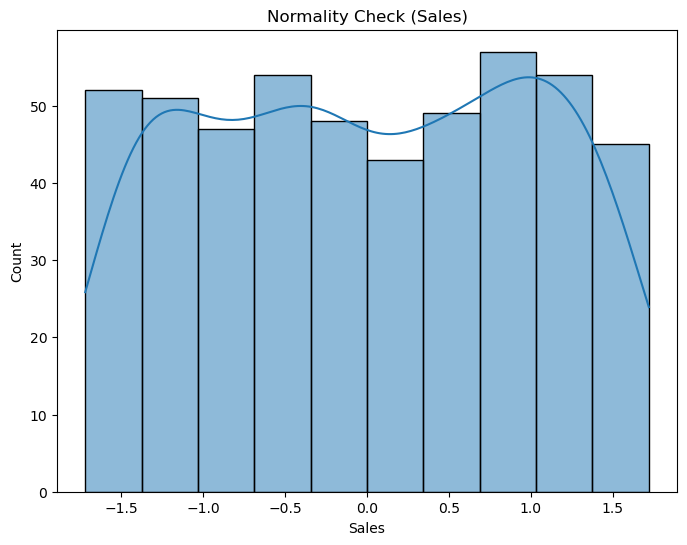

Shapiro-Wilk Test for Profit: Test Statistic = 0.9596, p-value = 0.0000
The data for Profit is not normally distributed.



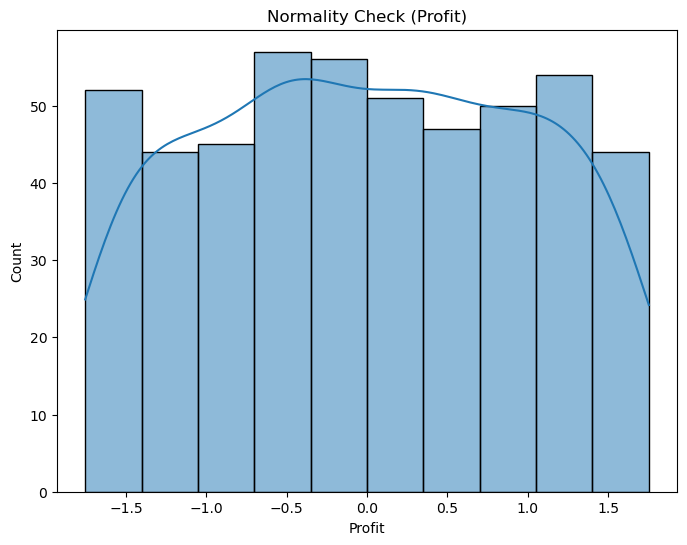

Shapiro-Wilk Test for Units Sold: Test Statistic = 0.9521, p-value = 0.0000
The data for Units Sold is not normally distributed.



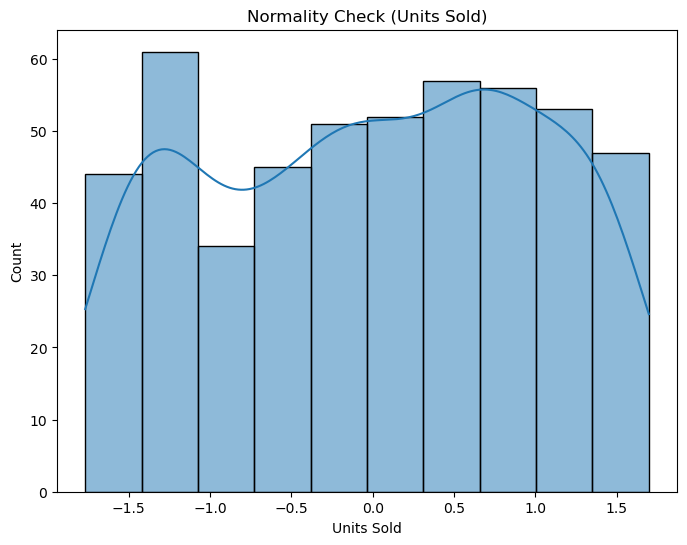

Shapiro-Wilk Test for Discount (%): Test Statistic = 0.9519, p-value = 0.0000
The data for Discount (%) is not normally distributed.



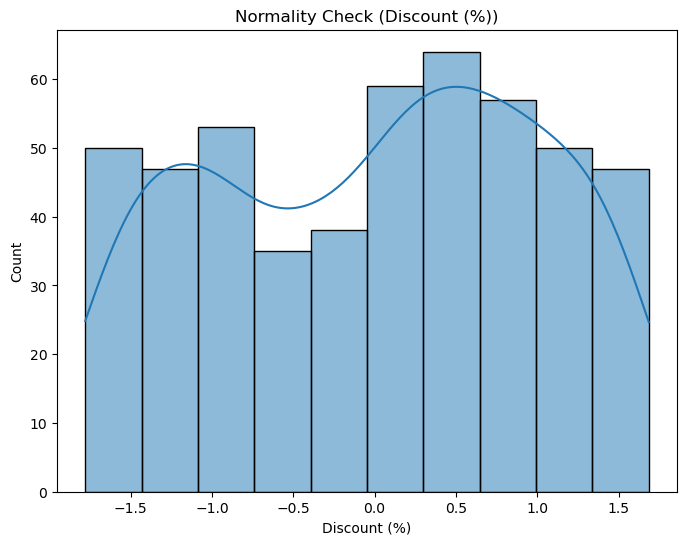

Shapiro-Wilk Test for Customer Rating: Test Statistic = 0.9644, p-value = 0.0000
The data for Customer Rating is not normally distributed.



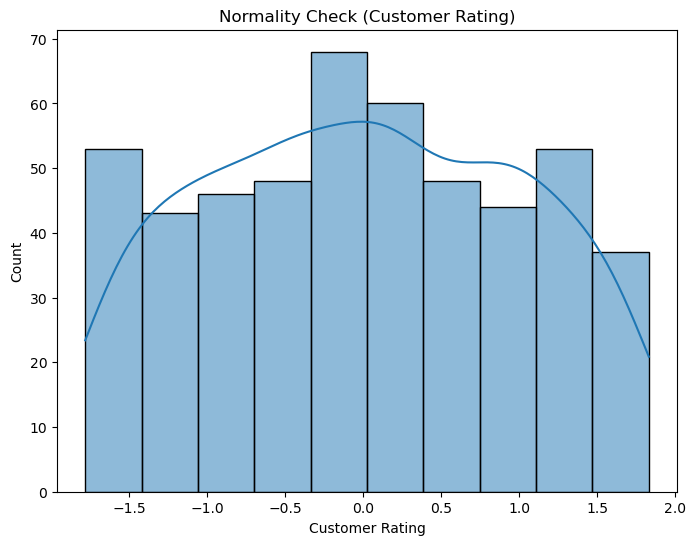

In [181]:
#Normality

features = ['Sales', 'Profit', 'Units Sold', 'Discount (%)', 'Customer Rating']

for feature in features:
    y = df_no_outliers[feature]
    sample_size = min(len(y), 5000)
    shapiro_test_stat, p_value = shapiro(y.sample(sample_size))
    
    print(f"Shapiro-Wilk Test for {feature}: Test Statistic = {shapiro_test_stat:.4f}, p-value = {p_value:.4f}")
    
    if p_value > 0.05:
        print(f"The data for {feature} is normally distributed.\n")
    else:
        print(f"The data for {feature} is not normally distributed.\n")
    
    plt.figure(figsize=(8, 6))
    sns.histplot(y, kde=True)
    plt.title(f"Normality Check ({feature})")
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.366
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.243
Time:                        12:58:41   Log-Likelihood:                -708.78
No. Observations:                 500   AIC:                             1422.
Df Residuals:                     498   BIC:                             1430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.469e-17      0.045  -7.75e-16      1.0

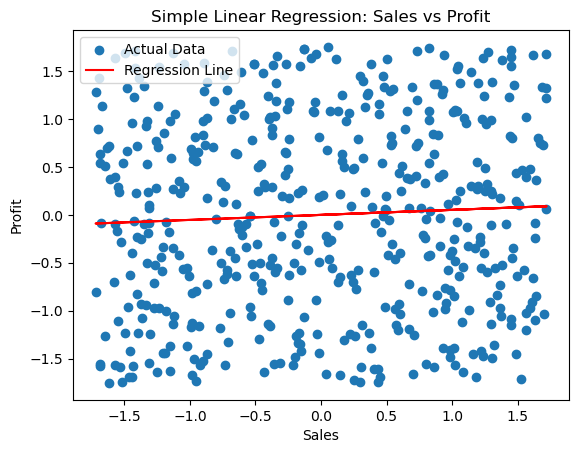

In [189]:
import statsmodels.api as sm

X_single = df_no_outliers[['Sales']]  
X_single = sm.add_constant(X_single) 
y = df_no_outliers['Profit'] 

ols_model = sm.OLS(y, X_single).fit()
print(ols_model.summary())

predictions = ols_model.predict(X_single)

plt.scatter(df_no_outliers['Sales'], y, label="Actual Data")
plt.plot(df_no_outliers['Sales'], predictions, color='red', label="Regression Line")
plt.title("Simple Linear Regression: Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6332
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.594
Time:                        13:00:08   Log-Likelihood:                -708.51
No. Observations:                 500   AIC:                             1425.
Df Residuals:                     496   BIC:                             1442.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.469e-17      0.045  -7.74e-16   

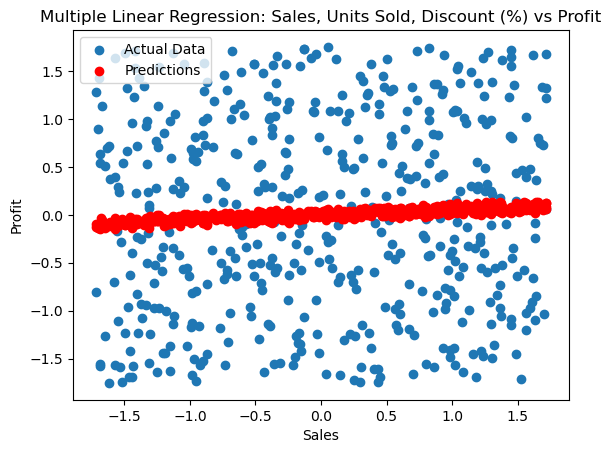

In [191]:
# Multiple Linear Regression
X_multiple = df_no_outliers[['Sales', 'Units Sold', 'Discount (%)']] 
X_multiple = sm.add_constant(X_multiple)
y = df_no_outliers['Profit']

ols_model_multiple = sm.OLS(y, X_multiple).fit()
print(ols_model_multiple.summary())

predictions_multiple = ols_model_multiple.predict(X_multiple)

plt.scatter(df_no_outliers['Sales'], y, label="Actual Data")
plt.scatter(df_no_outliers['Sales'], predictions_multiple, color='red', label="Predictions")
plt.title("Multiple Linear Regression: Sales, Units Sold, Discount (%) vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.show()


In [197]:
X = df_no_outliers[['Sales', 'Units Sold', 'Discount (%)', 'Customer Rating']]  
y = df_no_outliers['Profit'] 


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

In [205]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.17
Root Mean Squared Error: 1.08
R-squared: -0.20


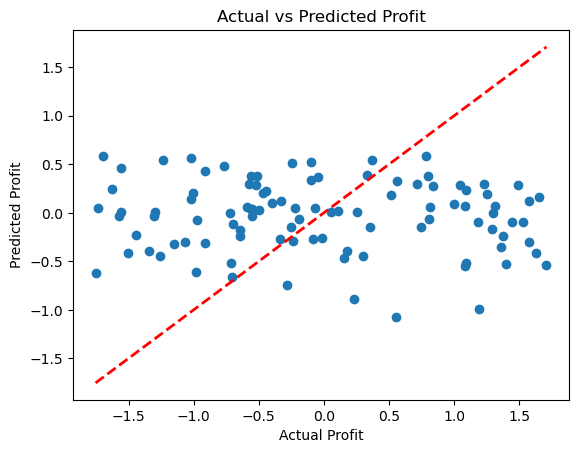

In [207]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()